In [3]:
from cpppo.server.enip import client
from cpppo.server.enip.get_attribute import attribute_operations
import time

In [54]:

HOST = "192.168.100.236" #this is the IP address running the Ethernet/IP Sim device
TAGS = ["@0x23/1/10"] # I don't know what this line means, is it like an identity address?

with client.connector(host=HOST) as conn:
    for index, descr, op, reply, status, value in conn.synchronous(operations=attribute_operations(TAGS, route_path=[], send_path='' )):
        print(": %20s: %s" % (descr, value))
        print(f'index:{index}, descr:{descr}, status:{status}, value:{value}')

: Single G_A_S      @0x0023/1/10: [64, 249, 255, 255]
index:0, descr:Single G_A_S      @0x0023/1/10, status:0, value:[64, 249, 255, 255]


In [8]:
from cpppo.server.enip.client import get_attribute_single

ImportError: cannot import name 'get_attribute_single' from 'cpppo.server.enip.client' (/Users/victorgeorge/Documents/psiori/autocrane/dl100_laserscan/cpppo/server/enip/client.py)

In [21]:
import sys

from cpppo.server import enip
from cpppo.server.enip import client

In [29]:
timeout			= 1.0
host			= '192.168.100.236'
with client.client( host=host, udp=True ) as conn:
    conn.get_attribute_single('@0x23/1/10')
    while True:
        response,elapsed= client.await_response( conn, timeout=timeout )
        if response:
            print( enip.enip_format( response ))
        else:
            print('nothing')
            break # No response (None) w'in timeout or EOF ({})

nothing


In [26]:
timeout			= 1.0
host			= '192.168.100.236'
with client.client( host=host, udp=True ) as conn:
    conn.list_identity( timeout=timeout )
    while True:
        response,elapsed= client.await_response( conn, timeout=timeout )
        if response:
            print( enip.enip_format( response ))
        else:
            print('nothing')
            break # No response (None) w'in timeout or EOF ({})

{
    "peer": [
        "192.168.100.236",
        44818
    ],
    "enip.command": 99,
    "enip.length": 45,
    "enip.session_handle": 0,
    "enip.status": 0,
    "enip.sender_context.input": "array('B', [0, 0, 0, 0, 0, 0, 0, 0])",
    "enip.options": 0,
    "enip.input": "array('B', [1, 0, 12, 0, 39, 0, 1, 0, 0, 2, 175, 18, 192, 168, 100, 236, 0, 0, 0, 0, 0, 0, 0, 0, 40, 3, 34, 0, 134, 0, 1, 2, 48, 0, 90, 172, 19, 132, 5, 68, 76, 49, 48, 48, 3])",
    "enip.CIP.list_identity.CPF.count": 1,
    "enip.CIP.list_identity.CPF.item[0].type_id": 12,
    "enip.CIP.list_identity.CPF.item[0].length": 39,
    "enip.CIP.list_identity.CPF.item[0].identity_object.version": 1,
    "enip.CIP.list_identity.CPF.item[0].identity_object.sin_family": 2,
    "enip.CIP.list_identity.CPF.item[0].identity_object.sin_port": 44818,
    "enip.CIP.list_identity.CPF.item[0].identity_object.sin_addr": "192.168.100.236",
    "enip.CIP.list_identity.CPF.item[0].identity_object.vendor_id": 808,
    "enip.CIP.list_

In [63]:
class DL100:
    def __init__(self):
        self.ip_address = "192.168.100.236"
        # class code for position sensor object
        self.tag_position_sensor = ["@0x23/1/10"]
        # variable holds the latest measurement.
        self.position = 0
        # time taken for getting the measurement.
        self.meas_duration = 0
    
    def get_position_data(self):
        start_time = time.time()
        with client.connector(host=self.ip_address) as conn:
            for index, descr, op, reply, status, value in conn.synchronous(operations=attribute_operations(self.tag_position_sensor, route_path=[], send_path='' )):
                self.position = value[0]
        self.meas_duration = time.time() - start_time
        return self.position
    
    def get_measurement_duration(self):
        return self.meas_duration
        

In [65]:
dl100_current = DL100()
posn_current = dl100_current.get_position_data()
meas_duration = dl100_current.get_measurement_duration()
print(f'posn_current:{posn_current}, meas_duration: {meas_duration}')

posn_current:62, meas_duration: 0.025375843048095703


In [30]:
!pwd
python -m cpppo.server.enip.get_attribute -S -a 192.168.100.236 @0x23/1/10

/Users/victorgeorge/Documents/psiori/autocrane/dl100_laserscan


In [ ]:
ip_address = '192.168.100.236'
class_code = 23
attribute_id = 10
cmd_string = 

In [ ]:
with client.connector(host=args.address, timeout=timeout ) as conn:
    start                   = cpppo.timer()
    num,idx                 = -1,-1
    for num,(idx,dsc,op,rpy,sts,val) in enumerate( conn.pipeline(
            operations=operations, depth=depth,
            multiple=multiple, timeout=timeout )):
        print( "%s: %3d: %s" % ( timestamp(), idx, val ))

    elapsed                 = cpppo.timer() - start
    print( "%3d operations using %3d requests in %7.2fs at pipeline depth %2s; %5.1f TPS" % (
        num+1, idx+1, elapsed, args.depth, num / elapsed ))

In [287]:
import cpppo
from cpppo.server.enip import client
from cpppo.server.enip.get_attribute import attribute_operations
import time

In [288]:
class DL100:
    def __init__(self):
        self.ip_address = "192.168.100.236"
        # class code for position sensor object
        self.tag_position_sensor = ["@0x23/1/10"]
        # variable holds the latest measurement.
        self.position = 0
        # time taken for getting the measurement in millisec.
        self.meas_duration = 0
        # times measurement is taken
        self.multiple = 1
        self.operations = attribute_operations(self.tag_position_sensor, route_path=[], send_path='' )
    
    def get_position_data(self):
        with client.connector(host=self.ip_address) as conn:
            start = cpppo.timer()
            for index, descr, op, reply, status, value in conn.pipeline(operations = self.operations, 
                                                                        depth = 20, multiple = 100):
                self.position = self._convert_meas_data(value)
        self.meas_duration = 1000*(time.time() - start_time)
        return self.position
    
    def _convert_meas_data(self, meas_data):
        """
        data read from scanner in changed endian. Use the function to convert raw data to position value.
        Data recorded in mm
        """
        distance_calc = meas_data[0] + meas_data[1]*(16**2) + meas_data[2]*(16**4) + meas_data[3]*(16**6)
        return distance_calc
    
    def get_measurement_duration(self):
        return self.meas_duration

In [289]:
dl100_current = DL100()
posn_current = dl100_current.get_position_data()
meas_duration = dl100_current.get_measurement_duration()
print(f'posn_current:{posn_current}, meas_duration: {meas_duration}')

ConnectionRefusedError: [Errno 61] Connection refused

In [22]:
measurements_position = []
measurements_duration = []
trials = 50
dl100_current = DL100()
for i in range(trials):
    posn_current = dl100_current.get_position_data()
    meas_duration = dl100_current.get_measurement_duration()
    measurements_position.append(posn_current)
    measurements_duration.append(meas_duration)

Text(0.5, 1.0, 'measurement time')

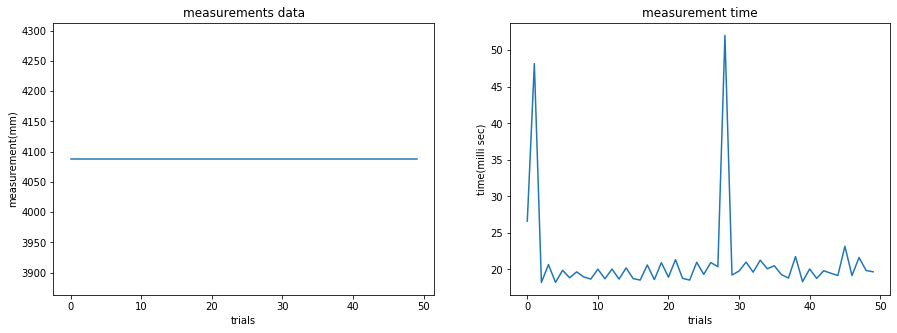

In [23]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax1.plot(measurements_position)
ax1.set_xlabel('trials')
ax1.set_ylabel('measurement(mm)')
ax1.set_title('measurements data')

ax2.plot(measurements_duration)
ax2.set_xlabel('trials')
ax2.set_ylabel('time(milli sec)')
ax2.set_title('measurement time')

In [37]:
import cpppo
# from cpppo.history import timestamp
from cpppo.server.enip import client

In [45]:
tag_position_sensor = ["@0x23/1/10"]
operations = attribute_operations(tag_position_sensor, route_path=[], send_path='' )
depth = 1
multiple = 1
with client.connector(host = "192.168.100.236") as conn:
    start                   = cpppo.timer()
    num,idx                 = -1,-1
    for num,(idx,dsc,op,rpy,sts,val) in enumerate( conn.pipeline(
            operations=operations, depth = 20, multiple=multiple)):
        print( "%3d: %s" % (idx, val ))

    elapsed                 = cpppo.timer() - start
    print( "%3d operations using %3d requests in %7.2fs at pipeline depth %2s; %5.1f TPS" % (
        num+1, idx+1, elapsed, depth, num / elapsed ))

  0: None
  1 operations using   1 requests in    0.01s at pipeline depth  1;   0.0 TPS


In [138]:
import logging
import sys
import time
import threading
import numpy as np

import cpppo
from cpppo.server.enip import poll
from cpppo.server.enip.get_attribute import proxy_simple as device

In [139]:
# param_distn_read = [('@0x23/1/10','DINT'),('@1/1/7','SSTRING')]
# param_device_info = [('@1/1/1','INT'),('@1/1/7','SSTRING')]
# param_device_info = [('@1/1/1','INT'),('@0x23/1/10','DINT')]

In [157]:
hostname = "192.168.100.236"
buffer = []
values = {} # { <parameter>: (<timer>, <value>), ... }
poller = threading.Thread(
    target=poll.poll, kwargs={ 
        'proxy_class': device,
        'address': (hostname, 44818), # 44818: port for Ethernet IP
        'cycle': 0.030,
        'timeout': 0.1,
        'process': lambda par,val: buffer.append( { par: (val, time.time()) } ),
        'params': [('@0x23/1/10','DINT'), ('@0x23/1/24','DINT')],
    })
# poller.daemon = True
# 'params': [('@1/1/1','INT'),('@0x23/1/10','DINT')],
# 'params': [('@0x23/1/10','DINT'), ('@0x23/1/24','DINT')],
poller.start()

In [158]:
# Monitor the values dict (updated in another Thread)
# pos
# vel
# pos?ts
# vel_ts
while True:
    while buffer:
        # sample output of popitem: ('@0x23/1/10', 'DINT'): [4131]
        popped_out = buffer.pop(0)
        # attribute id matches with distance.
        try:
#             print(buffer.pop(0)[('@0x23/1/10', 'DINT')])
#             print(buffer.pop(0)[('@0x23/1/24', 'DINT')])
            print(buffer.pop(0))
            b = 0
        except:
            a = 0
        #if (popped_out[('@0x23/1/10', 'DINT')] == ('@0x23/1/10', 'DINT')):
        #    curr_distance = popped_out[1]
        #    print(f'curr_distance: {curr_distance}')
#         logging.warning( "%16s == %r", *values.popitem() )
#         logging.warning(*values.popitem() )
    time.sleep( 0.5 )

{('@0x23/1/24', 'DINT'): ([-9], 1580755443.2870872)}
{('@0x23/1/24', 'DINT'): ([-3], 1580755443.3209112)}
{('@0x23/1/24', 'DINT'): ([5], 1580755443.3378172)}
{('@0x23/1/24', 'DINT'): ([-9], 1580755443.420867)}
{('@0x23/1/24', 'DINT'): ([4], 1580755443.476935)}
{('@0x23/1/24', 'DINT'): ([3], 1580755443.479188)}
{('@0x23/1/24', 'DINT'): ([12], 1580755443.493741)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755443.5054789)}
{('@0x23/1/24', 'DINT'): ([4], 1580755443.513835)}
{('@0x23/1/24', 'DINT'): ([-16], 1580755443.525572)}
{('@0x23/1/24', 'DINT'): ([-13], 1580755443.534482)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755443.545235)}
{('@0x23/1/24', 'DINT'): ([-14], 1580755443.548479)}
{('@0x23/1/24', 'DINT'): ([-11], 1580755443.5504682)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755443.569961)}
{('@0x23/1/24', 'DINT'): ([-5], 1580755443.57155)}
{('@0x23/1/10', 'DINT'): ([4350], 1580755443.598939)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755443.601585)}
{('@0x23/1/24', 'DINT'): ([-2], 1580755443.605147)

{('@0x23/1/24', 'DINT'): ([17], 1580755445.2499032)}
{('@0x23/1/24', 'DINT'): ([2], 1580755445.251303)}
{('@0x23/1/24', 'DINT'): ([11], 1580755445.253525)}
{('@0x23/1/24', 'DINT'): ([-7], 1580755445.266809)}
{('@0x23/1/24', 'DINT'): ([2], 1580755445.268946)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755445.288848)}
{('@0x23/1/24', 'DINT'): ([-8], 1580755445.296963)}
{('@0x23/1/24', 'DINT'): ([-9], 1580755445.29899)}
{('@0x23/1/24', 'DINT'): ([-8], 1580755445.315813)}
{('@0x23/1/24', 'DINT'): ([-7], 1580755445.327007)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755445.335583)}
{('@0x23/1/24', 'DINT'): ([-7], 1580755445.3426719)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755445.357261)}
{('@0x23/1/24', 'DINT'): ([-7], 1580755445.361613)}
{('@0x23/1/10', 'DINT'): ([4350], 1580755445.366951)}
{('@0x23/1/24', 'DINT'): ([0], 1580755445.369028)}
{('@0x23/1/24', 'DINT'): ([-10], 1580755445.373575)}
{('@0x23/1/24', 'DINT'): ([-9], 1580755445.3784451)}
{('@0x23/1/24', 'DINT'): ([-3], 1580755445.39101)}
{('@0

{('@0x23/1/24', 'DINT'): ([51], 1580755447.112649)}
{('@0x23/1/24', 'DINT'): ([-15], 1580755447.115631)}
{('@0x23/1/24', 'DINT'): ([48], 1580755447.1170719)}
{('@0x23/1/24', 'DINT'): ([50], 1580755447.124065)}
{('@0x23/1/10', 'DINT'): ([4352], 1580755447.136909)}
{('@0x23/1/24', 'DINT'): ([-45], 1580755447.156117)}
{('@0x23/1/24', 'DINT'): ([-44], 1580755447.157504)}
{('@0x23/1/24', 'DINT'): ([-38], 1580755447.159376)}
{('@0x23/1/24', 'DINT'): ([-48], 1580755447.1614249)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755447.16821)}
{('@0x23/1/24', 'DINT'): ([-49], 1580755447.169624)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755447.18191)}
{('@0x23/1/24', 'DINT'): ([39], 1580755447.1857972)}
{('@0x23/1/24', 'DINT'): ([50], 1580755447.20298)}
{('@0x23/1/10', 'DINT'): ([4353], 1580755447.209871)}
{('@0x23/1/24', 'DINT'): ([68], 1580755447.2137458)}
{('@0x23/1/10', 'DINT'): ([4351], 1580755447.221353)}
{('@0x23/1/24', 'DINT'): ([47], 1580755447.230428)}
{('@0x23/1/10', 'DINT'): ([4353], 1580755447.24

KeyboardInterrupt: 

In [159]:
buffer.pop(-1)
# [('@0x23/1/10', 'DINT')]

{('@0x23/1/24', 'DINT'): ([-7], 1580755455.688958)}

In [160]:
len(buffer)

1824

In [161]:
data_chunk = buffer

time_stamps_pos = []
time_stamps_vel = []
distance_buffer = []
velocity_buffer = []
for data_dict in buffer:
    for key in data_dict:
        # check if key matches distance tag:
        if (key == ('@0x23/1/10', 'DINT')):
            curr_dist, time_st = data_dict[key][0], data_dict[key][1]
            time_stamps_pos.append(time_st)
            distance_buffer.append(curr_dist)
            
        # check if key matches velocity tag:
        if (key == ('@0x23/1/24', 'DINT')):
            curr_vel, time_st = data_dict[key][0], data_dict[key][1]
            time_stamps_vel.append(time_st)
            velocity_buffer.append(curr_vel)

# for meas duration
meas_duration_pos = []
for i, ts in enumerate(time_stamps_pos[:-2]):
    delta = time_stamps_pos[i + 1] - ts
    meas_duration_pos.append(delta*1000)
    
    
distance_buffer = np.array(distance_buffer)
velocity_buffer = np.array(velocity_buffer)
meas_duration_pos = np.array(meas_duration_pos)

# for velocity duration
meas_duration_vel = []
for i, ts in enumerate(time_stamps_vel[:-2]):
    delta = time_stamps_vel[i + 1] - ts
    meas_duration_vel.append(delta*1000)
    
meas_duration_vel = np.array(meas_duration_vel)
    
print(f'distance_buffer shape: {distance_buffer.shape}, meas_duration shape: {meas_duration_pos.shape} ')

print(f'velocity_buffer shape: {velocity_buffer.shape}, meas_duration_vel shape: {meas_duration_vel.shape} ')

distance_buffer shape: (774, 1), meas_duration shape: (772,) 
velocity_buffer shape: (1652, 1), meas_duration_vel shape: (1650,) 


In [162]:
print(f'meas_duration mean: {np.mean(meas_duration_pos)}, max: {np.max(meas_duration_pos)}, min: {np.min(meas_duration_pos)}')


meas_duration mean: 12.95311401545075, max: 126.58810615539551, min: 1.3051033020019531


In [163]:
print(f'meas_duration_vel mean: {np.mean(meas_duration_vel)}, max: {np.max(meas_duration_vel)}, min: {np.min(meas_duration_vel)}')

meas_duration_vel mean: 6.080231666564941, max: 103.02925109863281, min: 0.5478858947753906


Text(0.5, 1.0, 'measurement time')

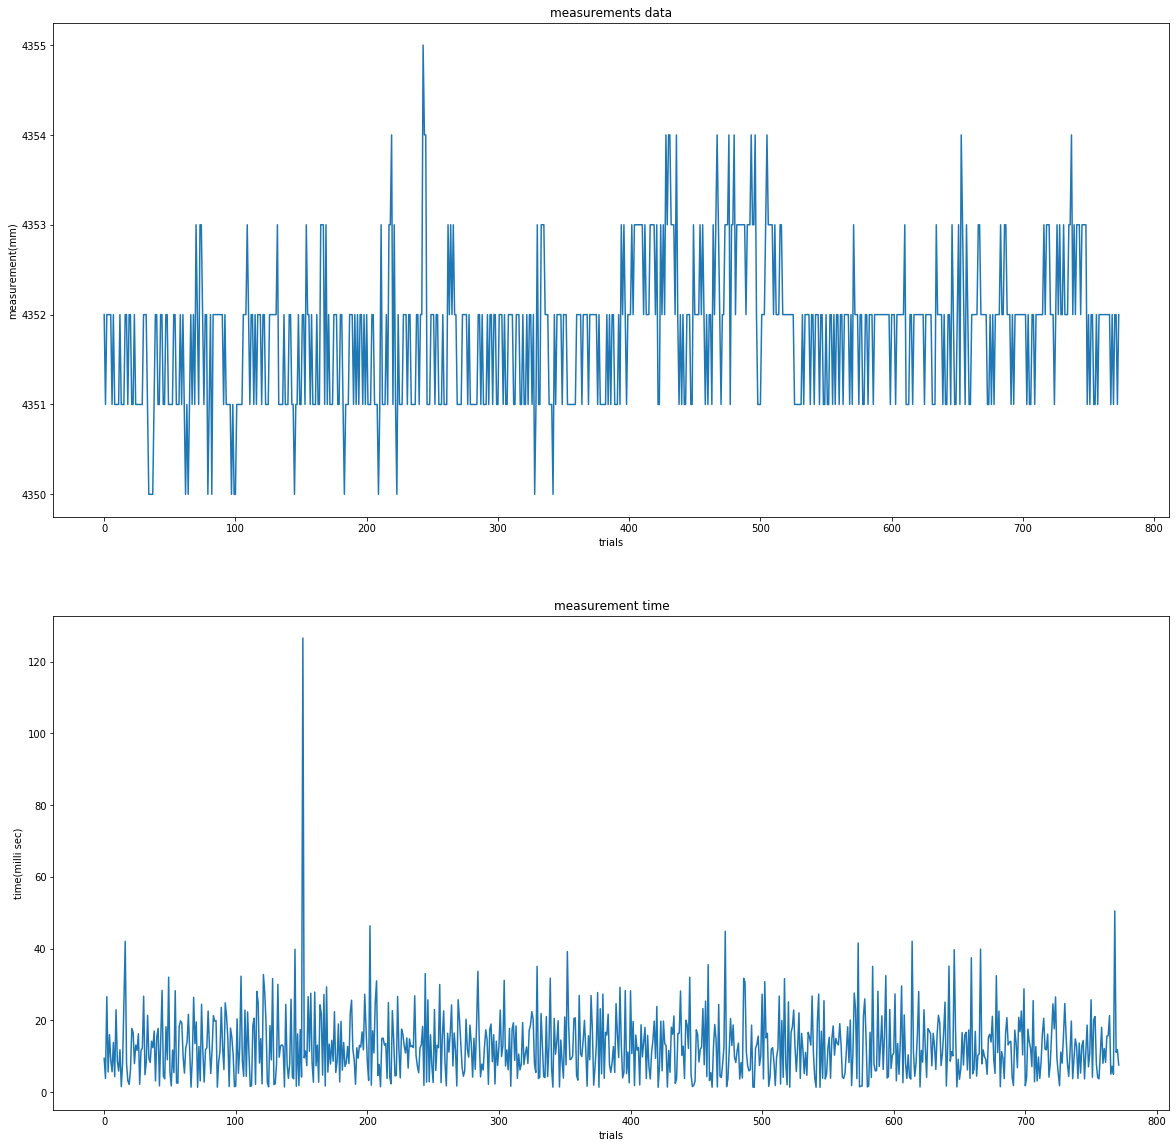

In [164]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
ax1.plot(distance_buffer)
ax1.set_xlabel('trials')
ax1.set_ylabel('measurement(mm)')
ax1.set_title('measurements data')

ax2.plot(meas_duration_pos)
ax2.set_xlabel('trials')
ax2.set_ylabel('time(milli sec)')
ax2.set_title('measurement time')

Text(0.5, 1.0, 'measurement time')

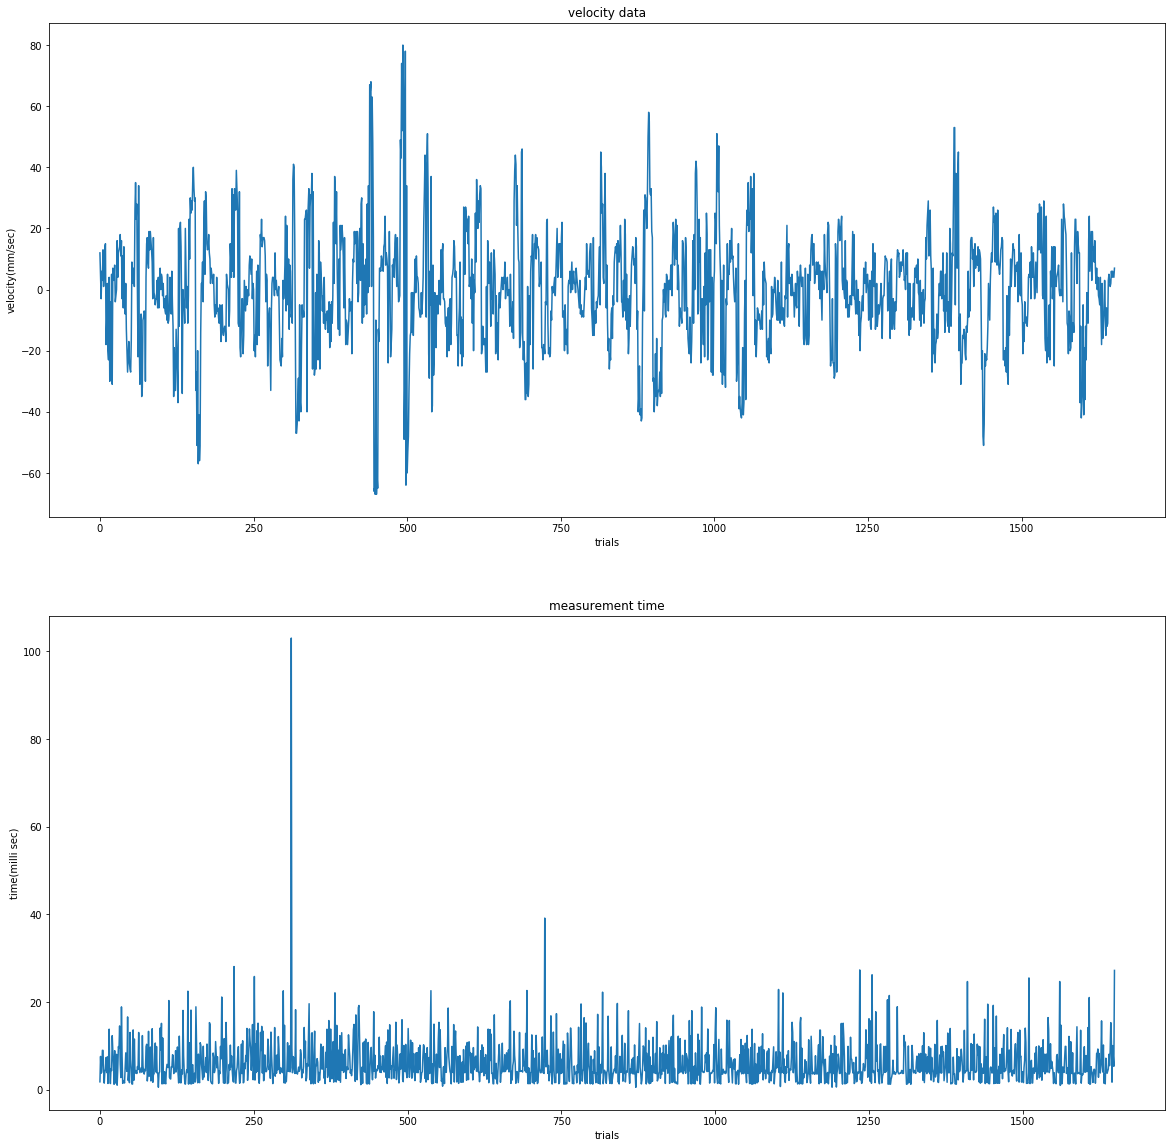

In [165]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
ax1.plot(velocity_buffer)
ax1.set_xlabel('trials')
ax1.set_ylabel('velocity(mm/sec)')
ax1.set_title('velocity data')

ax2.plot(meas_duration_vel)
ax2.set_xlabel('trials')
ax2.set_ylabel('time(milli sec)')
ax2.set_title('measurement time')

In [105]:
num_data_points = 20
for i in range(num_data_points):
    data = buffer[-i]
    try:
        rel_data = data[('@0x23/1/10', 'DINT')]
        print(f'{rel_data} rel_data shape: {len(rel_data)}, {rel_data[0]}, {rel_data[1]}')
    except:
        a = 0
    
    
            
# print(buffer.pop(0)[('@0x23/1/10', 'DINT')])

([4709], 1580399238.1104078) rel_data shape: 2, [4709], 1580399238.1104078
([4709], 1580399238.089684) rel_data shape: 2, [4709], 1580399238.089684
([4710], 1580399238.0702012) rel_data shape: 2, [4710], 1580399238.0702012
([4709], 1580399238.050178) rel_data shape: 2, [4709], 1580399238.050178
([4709], 1580399238.030198) rel_data shape: 2, [4709], 1580399238.030198
([4709], 1580399238.011594) rel_data shape: 2, [4709], 1580399238.011594
([4709], 1580399237.984944) rel_data shape: 2, [4709], 1580399237.984944
([4710], 1580399237.971015) rel_data shape: 2, [4710], 1580399237.971015
([4709], 1580399237.950568) rel_data shape: 2, [4709], 1580399237.950568
([4709], 1580399237.929468) rel_data shape: 2, [4709], 1580399237.929468


In [168]:
popped_item = values.popitem()
len(values), values['@1/1/1', 'INT'], values
popped_item

(('@1/1/7', 'SSTRING'), ['DL100'])

In [4]:
fruit_basket = {'apple': 5,
               'orange': 7,
               'pear': 10}
fruit_basket.update({'mango': 9})
fruit_basket.update({'apple1': 100})